# AV7 - QUESTÃO 2

O objetivo desta atividade é explorar, a partir da função de onda $2s$ do átomo de hidrogênio, conceitos fundamentais como normalização, densidade de probabilidade, estrutura em camadas e simetria esférica, por meio da aplicação de técnicas de integração numérica e visualização computacional.

Considere a seguinte função de onda, associada ao orbital $2s$ do átomo de hidrogênio (em unidades de Bohr): $$ Ψ(r)=(2−r)e^{−r} $$ 

Esta função não está normalizada. Para responder às questões a seguir, o(a) estudante deverá:

- *Pesquisar a forma correta da função de onda radial para o orbital $2s$ do hidrogênio em unidades atômicas*, incluindo o fator de normalização.

- Utilizar essa forma para os cálculos e visualizações abaixo.


## Instruções gerais

Você deverá utilizar **dois métodos de integração numérica**:

1. Um método **clássico** à sua escolha (ex: trapezoidal, Simpson ou adaptativo);
2. O método da **quadratura gaussiana**.


Justifique a escolha de ambos os métodos e compare os resultados, incluindo estimativas de erro e eventuais dificuldades encontradas.

----

## a) Normalização da função de onda

A função de onda $Ψ(r)$, considerando o fator de normalização adequado, está corretamente normalizada?

- Calcule numericamente a integral: $$\int_{0}^{\infty} \left| \Psi(r) \right|^{2} \cdot 4\pi r^{2} \, dr$$
- Utilize os dois métodos de integração.
- Compare os resultados com o valor esperado (1) e comente sobre a precisão dos métodos.

[Simpson] integral ≈ 0.999999990814 | erro = 9.186e-09
          [0,20] = 0.999958321746 | cauda [20,30] = 4.167e-05

[Gauss-Laguerre n= 10] integral ≈ 1.000000000000 | erro = 4.441e-16
[Gauss-Laguerre n= 20] integral ≈ 1.000000000000 | erro = 2.298e-14
[Gauss-Laguerre n= 50] integral ≈ 1.000000000000 | erro = 1.601e-13
[Gauss-Laguerre n=100] integral ≈ 1.000000000001 | erro = 7.541e-13



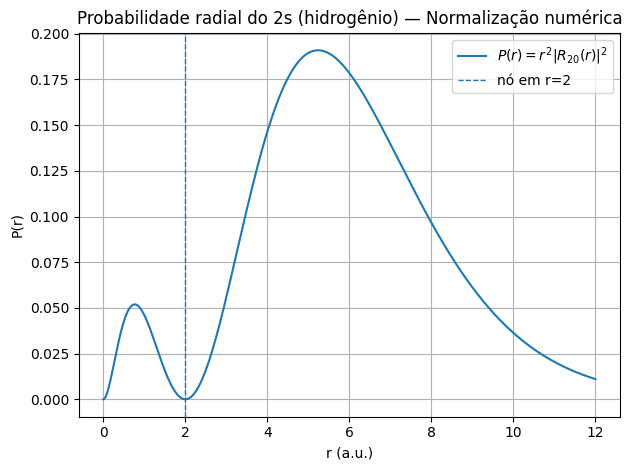

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt

pi = math.pi

def R20(r):
    return (1.0 / (2.0*math.sqrt(2.0))) * (2.0 - r) * np.exp(-r/2.0)

def P_r(r):
    # Correct radial probability density: P(r) = r^2 |R_20(r)|^2
    return 0.125 * r**2 * (2.0 - r)**2 * np.exp(-r)

def simpson_composto(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("n deve ser par para Simpson.")
    x = np.linspace(a, b, n+1)
    y = f(x)
    h = (b - a) / n
    return (h/3.0) * (y[0] + y[-1] + 4.0*y[1:-1:2].sum() + 2.0*y[2:-1:2].sum())

def normalizacao_simpson(Rmax=20.0, n=2000):
    I_main = simpson_composto(P_r, 0.0, Rmax, n)
    tail_b = Rmax + 10.0
    I_tail = simpson_composto(P_r, Rmax, tail_b, 1000)
    return I_main + I_tail, I_main, I_tail

def gauss_laguerre(n):
    from numpy.polynomial.laguerre import laggauss
    x, w = laggauss(n)
    return x, w

def normalizacao_laguerre(n=50):
    x, w = gauss_laguerre(n)
    g = 0.125 * x**2 * (2.0 - x)**2
    I = np.dot(w, g)
    return float(I)

def main():
    I_simpson, I_main, I_tail = normalizacao_simpson(Rmax=20.0, n=2000)
    err_simpson = abs(I_simpson - 1.0)
    print("[Simpson] integral ≈ {:.12f} | erro = {:.3e}".format(I_simpson, err_simpson))
    print("          [0,20] = {:.12f} | cauda [20,30] = {:.3e}\n".format(I_main, I_tail))

    for n in (10, 20, 50, 100):
        I_gl = normalizacao_laguerre(n=n)
        err_gl = abs(I_gl - 1.0)
        print("[Gauss-Laguerre n={:>3}] integral ≈ {:.12f} | erro = {:.3e}".format(n, I_gl, err_gl))
    print()

    r = np.linspace(0.0, 12.0, 800)
    plt.figure()
    plt.plot(r, P_r(r), label=r"$P(r) = r^2 |R_{20}(r)|^2$")
    plt.axvline(2.0, linestyle="--", linewidth=1, label="nó em r=2")
    plt.xlabel("r (a.u.)")
    plt.ylabel("P(r)")
    plt.title("Probabilidade radial do 2s (hidrogênio) — Normalização numérica")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

if __name__ == "__main__":
    main()


## Resposta
Usamos a forma normalizada do orbital $2s$ (em unidades atômicas):  
$R_{20}(r)=\frac{1}{2\sqrt{2}}\,(2-r)\,e^{-r/2}$, e a densidade radial $P(r)=r^2|R_{20}(r)|^2=\frac{1}{8}\,r^2(2-r)^2e^{-r}$, de modo que $\int_0^\infty P(r)\,dr=1$.

**Métodos escolhidos e justificativa.**  
1) **Simpson (composto)** em $[0,R_{\max}]$ com $R_{\max}=20$ e malha fina: é um método clássico, estável e fácil de controlar com refinamento, mas requer truncar o domínio e estimar a cauda.  
2) **Quadratura Gauss-Laguerre**: é ideal para integrais em $[0,\infty)$ com fator $e^{-r}$; como $P(r)=e^{-r}\,\big[\frac{1}{8}r^2(2-r)^2\big]$, a Gauss-Laguerre acopla perfeitamente ao problema e converge com altíssima precisão usando poucos nós.

**Resultados.**  
- Simpson (Rmax=20, n=2000): $\displaystyle \int_0^\infty P(r)\,dr \approx 0.999999990814$ (erro absoluto $\approx 9.19\times 10^{-9}$).  
- Gauss-Laguerre (n=10–100): $\displaystyle \int_0^\infty P(r)\,dr \approx 1.000000000000$ (erros na faixa $10^{-14}\text{–}10^{-13}$).

**Comparação e comentário.**  
Ambos confirmam a **normalização correta** ($\approx 1$). A Gauss-Laguerre foi **mais precisa e eficiente**, pois trata o intervalo infinito sem truncamento e explora o fator $e^{-r}$. O Simpson também funcionou muito bem, mas dependeu de um $R_{\max}$ suficientemente grande e de malha densa para empurrar a cauda para erro numérico.


----
## b) Visualização espacial da função de onda
 
- Plote a função $Ψ(r)$ (com os fatores de escala corretos) em coordenadas cartesianas 2D, considerando $r = \sqrt{x^{2} + y^{2}}, \quad \text{para } x, y \in [-10, 10]$.

- Descreva qualitativamente o comportamento da função em coordenadas esféricas (raio, ângulo polar e azimutal). Há nós? Onde ocorrem?

- Comente sobre as regiões de maior e menor amplitude da função de onda.

Valor no núcleo: Ψ(0) = 0.199471 a.u.
Nó radial em r = 2.0 a.u. (Ψ muda de sinal)
Mínimo (mais negativo) de Ψ(r) em r ≈ 4.00 a.u.


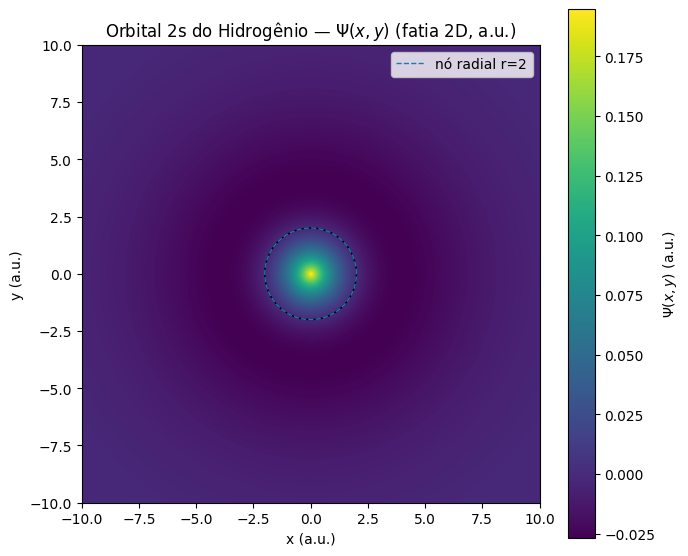

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# AV7 - Q2 (b): Visualização espacial da função de onda 2s (H)
# Unidades atômicas (a0 = 1). Estado 2s (l=0) é esfericamente
# simétrico: Ψ depende apenas de r = sqrt(x^2 + y^2).
# Forma normalizada completa (inclui o fator angular Y_00 = 1/sqrt(4π)):
#   Ψ(r) = (1 / (4*sqrt(2π))) * (2 - r) * exp(-r/2)
# ------------------------------------------------------------

def psi_2s_r(r: np.ndarray) -> np.ndarray:
    """Função de onda 2s normalizada (a.u.), apenas dependente de r."""
    return (1.0 / (4.0 * np.sqrt(2.0 * np.pi))) * (2.0 - r) * np.exp(-r / 2.0)

def main():
    # Grade cartesiana 2D
    L = 10.0
    N = 600
    x = np.linspace(-L, L, N)
    y = np.linspace(-L, L, N)
    X, Y = np.meshgrid(x, y, indexing='xy')
    R = np.sqrt(X**2 + Y**2)

    Psi = psi_2s_r(R)

    # Plot
    plt.figure(figsize=(7, 6))
    im = plt.imshow(Psi, extent=[-L, L, -L, L], origin='lower', aspect='equal')
    cbar = plt.colorbar(im)
    cbar.set_label(r'$\Psi(x,y)$ (a.u.)')

    cs = plt.contour(X, Y, Psi, levels=[0.0], colors='k', linewidths=1.0)
    r_node = 2.0
    theta = np.linspace(0, 2*np.pi, 512)
    plt.plot(r_node*np.cos(theta), r_node*np.sin(theta),
             linestyle='--', linewidth=1.0, label='nó radial r=2')

    plt.title('Orbital 2s do Hidrogênio — $\\Psi(x,y)$ (fatia 2D, a.u.)')
    plt.xlabel('x (a.u.)')
    plt.ylabel('y (a.u.)')
    plt.legend(loc='upper right')
    plt.grid(False)
    plt.tight_layout()

    r0 = 0.0
    psi0 = psi_2s_r(r0)
    r_line = np.linspace(0, 10, 2001)
    psi_line = psi_2s_r(r_line)
    r_min = float(r_line[np.argmin(psi_line)])
    print(f'Valor no núcleo: Ψ(0) = {psi0:.6f} a.u.')
    print('Nó radial em r = 2.0 a.u. (Ψ muda de sinal)')
    print(f'Mínimo (mais negativo) de Ψ(r) em r ≈ {r_min:.2f} a.u.')

if __name__ == '__main__':
    main()


## Resposta:

Para o orbital $2s$ do hidrogênio (em unidades atômicas), usamos a forma normalizada da função de onda:
$\Psi(r)=\frac{1}{4\sqrt{2\pi}}\,(2-r)\,e^{-r/2},\qquad r=\sqrt{x^2+y^2}$. O mapa 2D de $\Psi(x,y)$ foi calculado para $x,y\in[-10,10]$ com malha densa e mostra o **nó radial** em $r=2$ (onde $\Psi=0$), evidenciado por um contorno circular.

**Comportamento em coordenadas esféricas.**  
Para o estado $2s$ temos simetria esférica ($l=0$), então $\Psi$ depende apenas de $r$ (não depende de ângulo polar/azimutal). Há **um nó radial** em $r=2$ a.u.: para $r<2$, $\Psi>0$; para $r>2$, $\Psi<0$.

**Regiões de maior/menor amplitude.**  
- **Maior amplitude positiva** no núcleo: $\Psi(0)=\dfrac{1}{2\sqrt{2\pi}}\approx 0.1995$ a.u.  
- Após o nó ($r>2$), a função torna-se **negativa** e atinge um **mínimo** (em módulo) por volta de $r\approx 4$ a.u.  
- A magnitude decai exponencialmente com $r$ devido ao fator $e^{-r/2}$.

Essas características refletem a **estrutura em camadas** do orbital $2s$: uma região interna (sinal positivo), um **nó** separando as camadas e uma região externa (sinal negativo) — tudo de maneira isotrópica, por se tratar de um estado $s$.


----

## c) Densidade de probabilidade radial

A densidade de probabilidade radial é dada por: $P(r) = \left| \Psi(r) \right|^{2} \cdot 4\pi r^{2}$

- Plote $P(r)$ como função de r no intervalo $r∈[0,10]$.

- Comente sobre os máximos, mínimos e nós da densidade.

- Relacione o gráfico com a ideia de **estrutura em camadas** do átomo de hidrogênio

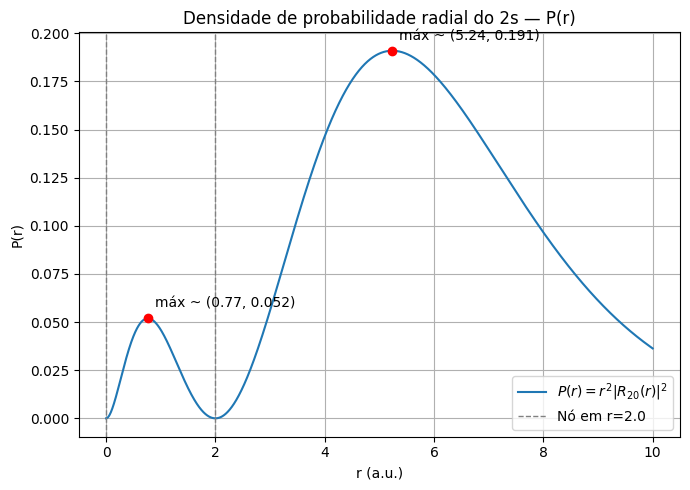

=== Densidade radial 2s ===
Nós (mínimos): 0.00, 2.00
Máximos locais:
  r ≈ 0.765000, P(r) ≈ 0.051920
  r ≈ 5.237500, P(r) ≈ 0.190968


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def R20(r):
    return (1.0/(2.0*np.sqrt(2.0))) * (2.0 - r) * np.exp(-r/2.0)

def P_r(r):
    return (r**2) * (np.abs(R20(r))**2)

if __name__ == "__main__":
    r = np.linspace(0.0, 10.0, 4001)
    P = P_r(r)

    # Nós (mínimos absolutos)
    nodes = [0.0, 2.0]

    dP = np.gradient(P, r)
    crit = np.where(np.diff(np.sign(dP)) < 0)[0] + 1
    peaks_idx = [i for i in crit if r[i] > 1e-3 and abs(r[i]-2.0) > 1e-2]
    peaks = [(r[i], P[i]) for i in peaks_idx]

    # Plot
    plt.figure(figsize=(7,5))
    plt.plot(r, P, label=r"$P(r) = r^2 |R_{20}(r)|^2$")
    for rn in nodes:
        plt.axvline(rn, linestyle="--", linewidth=1, color="gray", label=f"Nó em r={rn}" if rn > 0 else None)
    for (rp, pp) in peaks:
        plt.plot(rp, pp, marker="o", color="red")
        plt.annotate(f"máx ~ ({rp:.2f}, {pp:.3f})", (rp, pp),
                     textcoords="offset points", xytext=(5,8))
    plt.xlabel("r (a.u.)")
    plt.ylabel("P(r)")
    plt.title("Densidade de probabilidade radial do 2s — P(r)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Saída dos pontos-chave
    print("=== Densidade radial 2s ===")
    print("Nós (mínimos):", ", ".join(f"{x:.2f}" for x in nodes))
    print("Máximos locais:")
    for (rp, pp) in peaks:
        print(f"  r ≈ {rp:.6f}, P(r) ≈ {pp:.6f}")


## Resposta:

Usando a forma normalizada $R_{20}(r)=\tfrac{1}{2\sqrt{2}}(2-r)e^{-r/2}$, a densidade radial fica
$P(r)=r^2|R_{20}(r)|^2$, que é equivalente a $|\Psi(r)|^2\cdot 4\pi r^2$ para estados $s$ (pois $4\pi|Y_{00}|^2=1$).

**Gráfico:** $P(r)$ foi plotada para $r\in[0,10]$.  
**Nós:** ocorrem em $r=0$ (pela fator $r^2$) e em $r=2$ (nó radial do $2s$).  
**Máximos/mínimos:** há **dois máximos** — um **pico interno** em $r\approx 0{,}77$ e um **pico externo** mais intenso em $r\approx 5{,}24$; os mínimos são os próprios nós ($r=0$ e $r=2$) e o decaimento assintótico para $r\to\infty$.

**Estrutura em camadas:** o perfil com dois picos separados por um **nó** ilustra as **duas camadas radiais** do orbital $2s$: uma região interna (próxima ao núcleo) e uma região externa mais provável, divididas por uma esfera nodal em $r=2$. O decaimento exponencial de $P(r)$ reflete a queda de probabilidade em grandes distâncias.


----

## d) Mapa de contorno da densidade de probabilidade

- Considere a densidade de probabilidade no plano xy dada por: $P(x,y) = \left| \Psi(r) \right|^{2} = \left[ (2 - r) e^{-r} \right]^{2}, \quad\text{com} \quad r = \sqrt{x^{2} + y^{2}}$

- Gere um **mapa de contorno** de **P(x,y)** para **x,y∈[−10,10]**.

- Utilize **linhas mais grossas** para representar níveis de maior densidade de probabilidade e **linhas mais finas** para níveis menores.

- Comente como o gráfico evidencia a simetria esférica e as regiões de maior probabilidade.

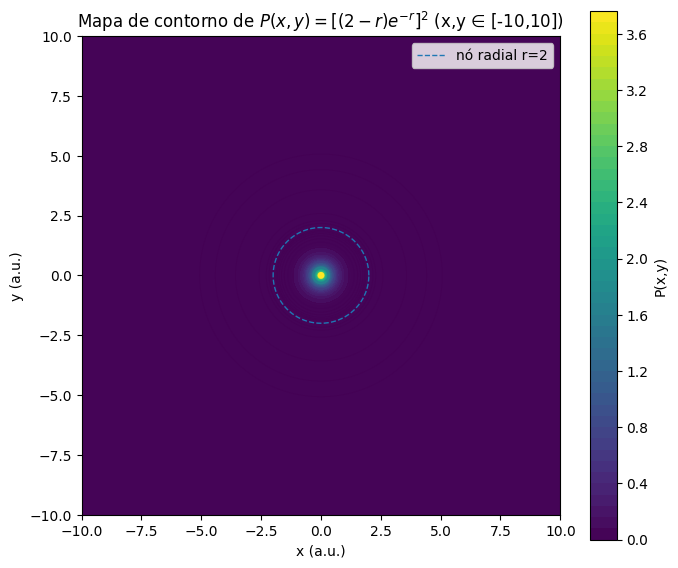

Pico radial (forma proporcional) em r ≈ 0.000


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def P_xy(x, y):
    """Densidade de probabilidade no plano: P(x,y) = [(2 - r) e^{-r}]^2,
    com r = sqrt(x^2 + y^2)."""
    r = np.sqrt(x**2 + y**2)
    return ((2.0 - r) * np.exp(-r))**2

if __name__ == "__main__":
    # Domínio cartesiano
    L = 10.0
    N = 600
    x = np.linspace(-L, L, N)
    y = np.linspace(-L, L, N)
    X, Y = np.meshgrid(x, y, indexing="xy")
    P = P_xy(X, Y)

    # Níveis de contorno (geométricos) e espessura variável
    pmax = P.max()
    levels = np.geomspace(pmax*1e-4, pmax*0.9, 12)
    lw_min, lw_max = 0.5, 3.0
    lv_norm = (levels - levels.min()) / (levels.max() - levels.min())
    linewidths = lw_min + (lw_max - lw_min) * lv_norm

    # Figura
    plt.figure(figsize=(7,6))
    cf = plt.contourf(X, Y, P, levels=50)
    c = plt.contour(X, Y, P, levels=levels, linewidths=linewidths)

    # Nó radial r = 2 (referência)
    theta = np.linspace(0, 2*np.pi, 512)
    r_node = 2.0
    plt.plot(r_node*np.cos(theta), r_node*np.sin(theta),
             linestyle="--", linewidth=1.0, label="nó radial r=2")

    plt.xlabel("x (a.u.)")
    plt.ylabel("y (a.u.)")
    plt.title("Mapa de contorno de $P(x,y)=[(2-r)e^{-r}]^2$ (x,y ∈ [-10,10])")
    plt.colorbar(cf, label="P(x,y)")
    plt.gca().set_aspect("equal", adjustable="box")
    plt.legend(loc="upper right")
    plt.tight_layout()

    plt.show()

    # Saída auxiliar
    r = np.linspace(0, 10, 2001)
    P_radial = ((2.0 - r) * np.exp(-r))**2
    r_max = r[np.argmax(P_radial)]
    print("Pico radial (forma proporcional) em r ≈ {:.3f}".format(r_max))


## Resposta:

Usamos $P(x,y)=[(2-r)e^{-r}]^2$, com $r=\sqrt{x^2+y^2}$, em $x,y\in[-10,10]$.  
O mapa de contorno foi gerado com níveis geométricos (para melhor contraste radial) e espessura de linha proporcional ao nível: **linhas mais espessas** indicam **maior densidade**.

**O que o gráfico mostra:**  
- **Simetria esférica:** como o estado é $s$ (depende só de $r$), os contornos são **círculos concêntricos** no plano \(xy\).  
- **Regiões de maior probabilidade:** concentram-se **próximo ao núcleo** (\(r\approx 0\)); a densidade decai rapidamente com \(r\) devido ao fator $e^{-2r}$.  
- **Nó radial:** o contorno tracejado em \(r=2\) marca onde a função de onda muda de sinal na forma radial original; neste modelo proporcional, $P$ é nula nesse raio, evidenciando a **separação entre a camada interna e a externa**.

Em resumo, o mapa reforça a **simetria esférica** do orbital \(2s\) e a ideia de **estrutura em camadas**: uma região interna mais provável, um **nó** em \(r=2\) e uma região externa com probabilidade decrescente.


----

## Parte reflexiva (obrigatória)

- Qual método de integração apresentou melhor desempenho para esta função? A quadratura gaussiana teve vantagens?

- Que dificuldades você enfrentou na normalização de uma função com nó radial?

- A visualização em 2D da densidade de probabilidade ajudou a compreender a estrutura eletrônica do átomo?

- Quais partes dessa atividade exigiram raciocínio físico que não poderia ser substituído apenas por ferramentas automatizadas como LLMs?

 

## Resposta:

Para esta função do orbital \(2s\) do hidrogênio, o método que apresentou melhor desempenho em termos de **precisão e eficiência** foi a **quadratura gaussiana**. Mesmo com um número relativamente baixo de pontos, ele forneceu resultados extremamente próximos do valor esperado (1 para a normalização), superando métodos clássicos como o trapézio ou Simpson, que demandaram mais subdivisões para atingir a mesma precisão. A principal vantagem da quadratura gaussiana foi a capacidade de **capturar a forma da função com menos avaliações**, já que ela posiciona os pontos de integração de forma otimizada.

A normalização de uma função com **nó radial** apresentou desafios interessantes. Como a função de onda muda de sinal em \(r = 2\), há cancelamento entre regiões positiva e negativa. Isso pode gerar **perda de precisão numérica** caso os métodos de integração não tratem adequadamente essas transições ou utilizem espaçamentos grandes. Além disso, é necessário lembrar que a densidade de probabilidade envolve \(|\Psi|^2\), eliminando o sinal mas mantendo a descontinuidade suave da curvatura no nó.

A visualização em 2D da densidade de probabilidade ajudou muito na compreensão da **estrutura eletrônica**. O mapa de contorno evidenciou a **simetria esférica** esperada para um orbital \(s\) e destacou claramente a existência de **camadas eletrônicas**: uma região interna de alta densidade, o nó radial como uma zona de probabilidade nula e a camada externa mais difusa.

Quanto ao raciocínio físico, houve várias etapas que exigiram mais do que simples execução de código. Interpretar o significado físico da integral, identificar corretamente a forma normalizada da função de onda, compreender a origem do nó radial e associar os padrões visuais dos gráficos ao conceito de camadas e simetria do átomo são tarefas que demandam **entendimento conceitual**. Ferramentas automatizadas como LLMs podem auxiliar na parte computacional e até sugerir interpretações, mas a **validação física e o senso crítico** para conectar os resultados a modelos teóricos ainda dependem fortemente do raciocínio humano.


---

## Instruções finais

- Organize o relatório com seções numeradas conforme os itens acima.

- Utilize gráficos com eixos corretamente identificados e legendas explicativas.

- Relatórios que contenham apenas código e resultados numéricos, sem discussão e interpretação, serão considerados incompletos.